<a href="https://colab.research.google.com/github/iamvssrao/FastAI/blob/main/Spectacle_detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()

KeyboardInterrupt: 

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/ && chmod 660 ~/.kaggle/kaggle.json

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/ && chmod 660 ~/.kaggle/kaggle.json

In [1]:
!pip install fastbook

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 76.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 62.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 44.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("jessicali9530/celeba-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/celeba-dataset


In [3]:
!pwd && ls

/content
sample_data


In [4]:
!ls /kaggle/input/celeba-dataset

img_align_celeba      list_bbox_celeba.csv     list_landmarks_align_celeba.csv
list_attr_celeba.csv  list_eval_partition.csv


In [7]:
content_root = "/kaggle/input/celeba-dataset"

In [21]:
import pandas as pd
gdf = pd.read_csv(f'/{content_root}/list_attr_celeba.csv')
gdf.iloc[0:5]

,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,Blurry,Brown_Hair,Bushy_Eyebrows,Chubby,Double_Chin,Eyeglasses,Goatee,Gray_Hair,Heavy_Makeup,High_Cheekbones,Male,Mouth_Slightly_Open,Mustache,Narrow_Eyes,No_Beard,Oval_Face,Pale_Skin,Pointy_Nose,Receding_Hairline,Rosy_Cheeks,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,000001.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,1,1,-1,1,-1,-1,1,-1,-1,1,-1,-1,-1,1,1,-1,1,-1,1,-1,-1,1
1,000002.jpg,-1,-1,-1,1,-1,-1,-1,1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,1,-1,1,-1,-1,1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,1
2,000003.jpg,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,1,1,-1,-1,1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,1
3,000004.jpg,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,1,-1,-1,-1,-1,1,-1,1,-1,1,1,-1,1
4,000005.jpg,-1,1,1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,1,1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,1


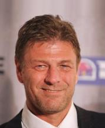

In [9]:
import fastbook
from fastbook import *
from fastai.vision.widgets import *
im = Image.open(f'/{content_root}/img_align_celeba/img_align_celeba/000659.jpg')
im.to_thumb(128,128)

In [10]:
len(gdf)

202599

In [11]:
!mkdir dataset && cd dataset && mkdir Spectacle && mkdir Not_Spectacle

In [12]:
import shutil
import os

spectacle_list = gdf[gdf["Eyeglasses"] == 1]["image_id"].tolist()
not_spectacle_list = gdf[gdf["Eyeglasses"] == -1]["image_id"].tolist()

dest_folder = os.path.join("dataset", "Spectacle")

for i in range(150):
    source_path = os.path.join(content_root, "img_align_celeba", "img_align_celeba", spectacle_list[i])
    dest_path = os.path.join(dest_folder, spectacle_list[i])
    try:
        shutil.copy(source_path, dest_path)
    except FileNotFoundError:
        print(f"File not found: {source_path}")

dest_folder = os.path.join("dataset", "Not_Spectacle")
for i in range(150):
    source_path = os.path.join(content_root, "img_align_celeba", "img_align_celeba", not_spectacle_list[i])
    dest_path = os.path.join(dest_folder,  not_spectacle_list[i])
    try:
        shutil.copy(source_path, dest_path)
    except FileNotFoundError:
        print(f"File not found: {source_path}")

In [13]:
!ls -p dataset/Not_Spectacle | grep -v / | wc -l

150


In [14]:
!ls -p dataset/Spectacle | grep -v / | wc -l

150


In [15]:
path = Path('dataset')
celebrities= DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=35),
    get_y=parent_label)
dls = celebrities.dataloaders(path)

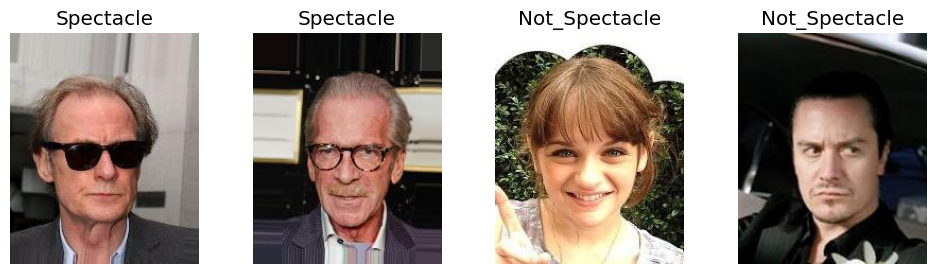

In [39]:
dls.train.show_batch(max_n=4, nrows=1)

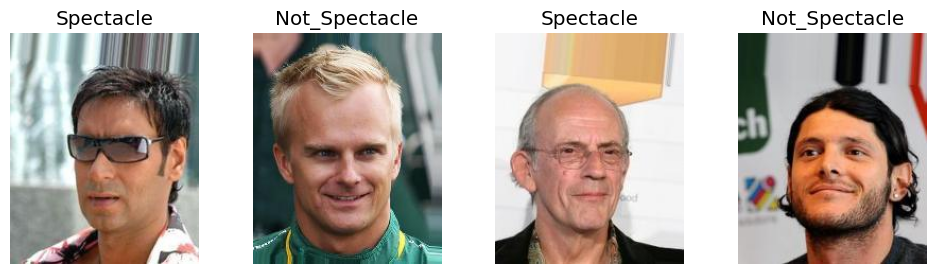

In [42]:
dls.valid.show_batch(max_n=4, nrows=1)

In [22]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(10)

epoch,train_loss,valid_loss,error_rate,time
0,1.427637,0.855706,0.450000,00:01


epoch,train_loss,valid_loss,error_rate,time
0,0.644379,0.540309,0.316667,00:01
1,0.471461,0.328559,0.166667,00:01
2,0.349905,0.203094,0.100000,00:01
3,0.264510,0.121249,0.050000,00:01
4,0.206213,0.089444,0.033333,00:01
5,0.171190,0.079852,0.033333,00:01
6,0.143077,0.075578,0.033333,00:01
7,0.123086,0.074847,0.033333,00:01
8,0.106887,0.073681,0.033333,00:01
9,0.093352,0.073386,0.033333,00:01


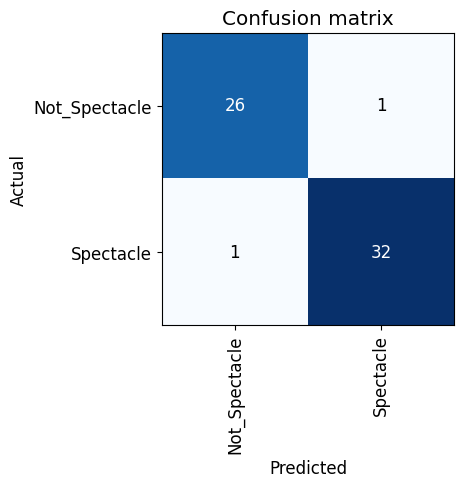

In [23]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

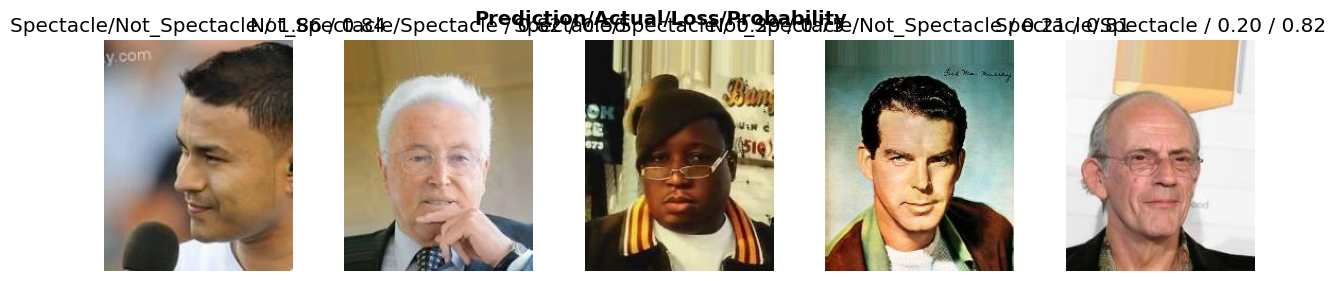

In [25]:
interp.plot_top_losses(5, nrows=1)

In [43]:
#hide_output
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [45]:
img = PILImage.create(btn_upload.data[-1])
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [46]:
pred,pred_idx,probs = learn.predict(img)

In [47]:
pred

'Spectacle'

In [48]:
pred,pred_idx,probs

('Spectacle', tensor(1), tensor([0.0014, 0.9986]))